<a href="https://colab.research.google.com/github/Gebreyowhans/Deep_Learning/blob/main/Reuters_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data,train_label),(test_data,test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [2]:
print("number of training data : ",len(train_data))
print("number of test data : ",len(test_data))


number of training data :  8982
number of test data :  2246


In [4]:
print(train_data[1])

[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


In [5]:
print(len(train_data[1]))

56


**Data Preparation**

In [6]:
#Encoding the input data
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.0
  return results


In [7]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

**Encoding the labels**

In [10]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1.0
  return results
  

In [11]:
y_train=to_one_hot(train_label)
y_test=to_one_hot(test_labels)

In [24]:
print(y_train[0])
print(train_label[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


TypeError: ignored

**built-in way to do Label encoding in Keras**

In [25]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_label)
y_test=to_categorical(test_labels)

In [26]:
print(len(y_train[0]))

46


**Model building**

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(46,activation="softmax")
])

**Comiling the Model**

In [40]:
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

**Setting aside a validation set**

In [41]:
print("shape of training data : ",x_train.shape)
print("shape of training label ",y_train.shape)

x_val=x_train[:1000]
partial_x_train=x_train[1000:]



y_val=y_train[:1000]
partial_y_train=y_train[1000:]

shape of training data :  (8982, 10000)
shape of training label  (8982, 46)


**Training the model**

In [42]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val)
                  )

Epoch 1/20
16/16 [==============================] - 5s 36ms/step - loss: 2.6757 - accuracy: 0.4505 - val_loss: 1.8071 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5035 - accuracy: 0.6824 - val_loss: 1.3597 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.1589 - accuracy: 0.7491 - val_loss: 1.1964 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9526 - accuracy: 0.7905 - val_loss: 1.1035 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7916 - accuracy: 0.8201 - val_loss: 1.0203 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6611 - accuracy: 0.8553 - val_loss: 0.9913 - val_accuracy: 0.7750
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5523 - accuracy: 0.8784 - val_loss: 0.9145 - val_accuracy: 0.7990
Epoch 8/20
16

**Plotting the training and validation loss**

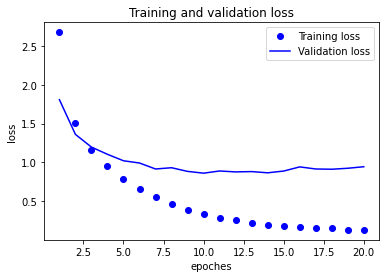

In [43]:
import matplotlib.pyplot as plt
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epoches=range(1,len(loss)+1)

plt.plot(epoches,loss,"bo", label="Training loss")
plt.plot(epoches,val_loss,"b",label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()
plt.show()


**Plotting the training and validation accuracy**

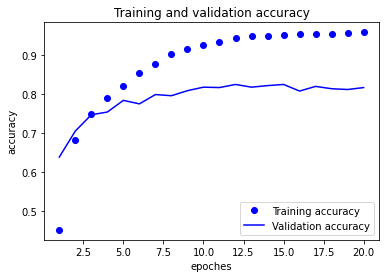

In [44]:
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
epoches=range(1,len(accuracy)+1)

plt.plot(epoches,accuracy,"bo", label="Training accuracy")
plt.plot(epoches,val_accuracy,"b",label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epoches")
plt.ylabel("accuracy")
plt.legend()
plt.show()

**The model begins to overfit after nine epochs. Let’s train a
new model from scratch for nine epochs and then evaluate it
on the test set.**

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5499 - accuracy: 0.5101
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.4288 - accuracy: 0.6952
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.1096 - accuracy: 0.7640
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9105 - accuracy: 0.8069
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7461 - accuracy: 0.8396
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6206 - accuracy: 0.8680
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5195 - accuracy: 0.8889
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4365 - accuracy: 0.9049
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9147 - accuracy: 0.7907


In [46]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9147 - accuracy: 0.7907


**Generating predictions on new data**

In [47]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [48]:
predictions[0]

array([7.0409333e-06, 1.6702212e-04, 1.0911639e-05, 9.2303950e-01,
       6.7051984e-02, 5.2740738e-06, 5.7104162e-06, 2.7899360e-04,
       3.0254403e-03, 7.3215870e-06, 9.8019125e-05, 3.1687133e-04,
       3.2432028e-05, 6.8998816e-05, 1.5034853e-04, 2.4345012e-05,
       1.6262166e-03, 5.1933199e-05, 6.3005151e-05, 1.0839340e-03,
       5.0480972e-04, 9.9063189e-05, 3.3396751e-05, 1.0179592e-04,
       4.3216300e-05, 8.8343877e-05, 1.1703187e-05, 1.5314495e-04,
       1.3229321e-04, 1.5946942e-04, 1.4306366e-04, 7.2664639e-05,
       2.0381291e-05, 6.4898864e-05, 1.2725426e-04, 4.6334171e-05,
       1.2525819e-04, 1.1873849e-04, 2.2838813e-05, 5.4776069e-04,
       3.2980603e-05, 1.7266550e-04, 1.9627394e-05, 2.7384731e-05,
       1.0112272e-05, 5.4140050e-06], dtype=float32)

In [50]:
print(predictions[0].shape)

(46,)


In [51]:
np.sum(predictions[0])

0.9999998

In [52]:
np.argmax(predictions[0])

3